In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('laptop_price.csv',encoding = 'ISO-8859-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.shape

(1303, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.0,331.5,659.0,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


In [7]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

**Observation**
- Data is clean containing no missing value

In [8]:
df.duplicated().sum()

0

In [7]:
# drop ID column
df.drop(columns=['laptop_ID'],axis=1,inplace=True)

### change the price euro to pkr rupees

In [8]:
# change the price euro to pkr
df["Price"]=df['Price_euros']*238
df['Price']=df.Price.astype('int32')

In [9]:
# drop Price_Euros Columns
df.drop(columns=['Price_euros'],axis=1,inplace=True)

# Exploratory data analysis

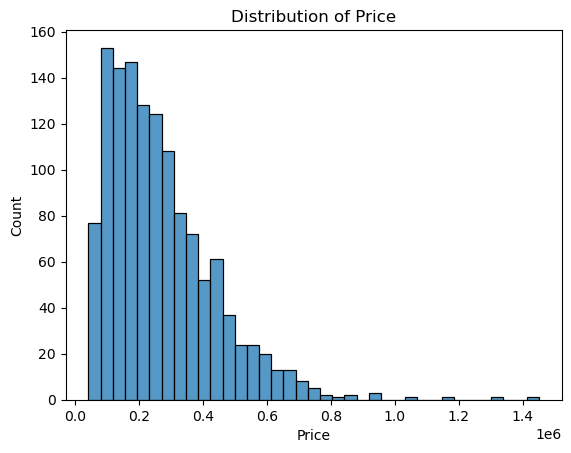

In [10]:
sns.histplot(df.Price)
plt.title("Distribution of Price")
plt.show()

**Observation**
- Data is skew

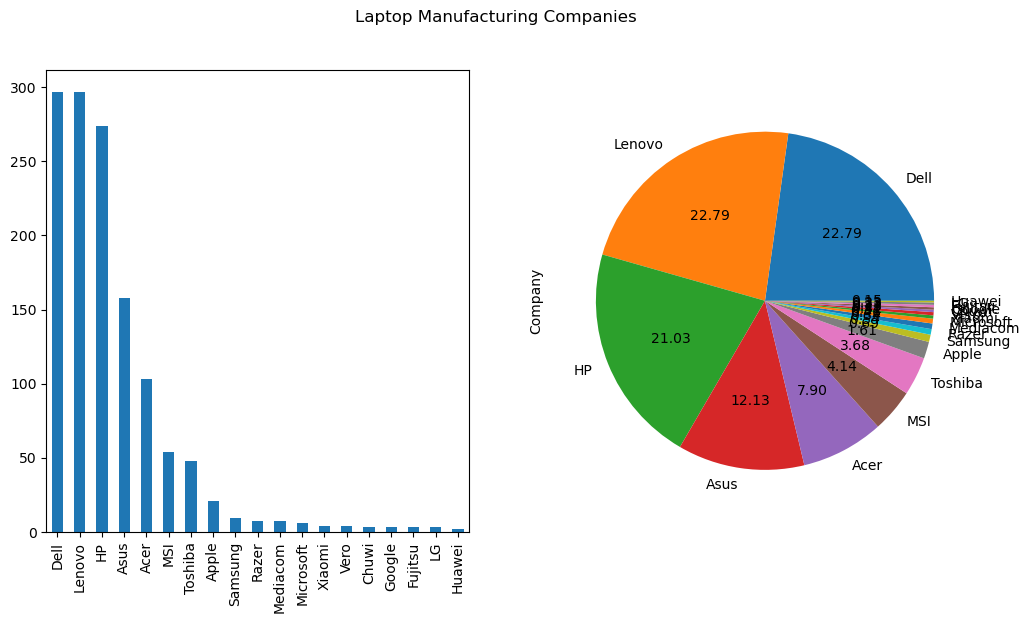

In [19]:
plt.figure(figsize=(12,6))
plt.suptitle("Laptop Manufacturing Companies")
plt.subplot(1,2,1)
df.Company.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
df.Company.value_counts().plot(kind='pie',autopct='%.2f')
#plt.legend(loc=1)
plt.show()

**Observation**
- Top 5 Manufacturing Companies are
- **Dell 22.79%**
- **Lenovo 22.79%**
- Hp 21.3%
- Asus 12.13%
- Acer 7.9%

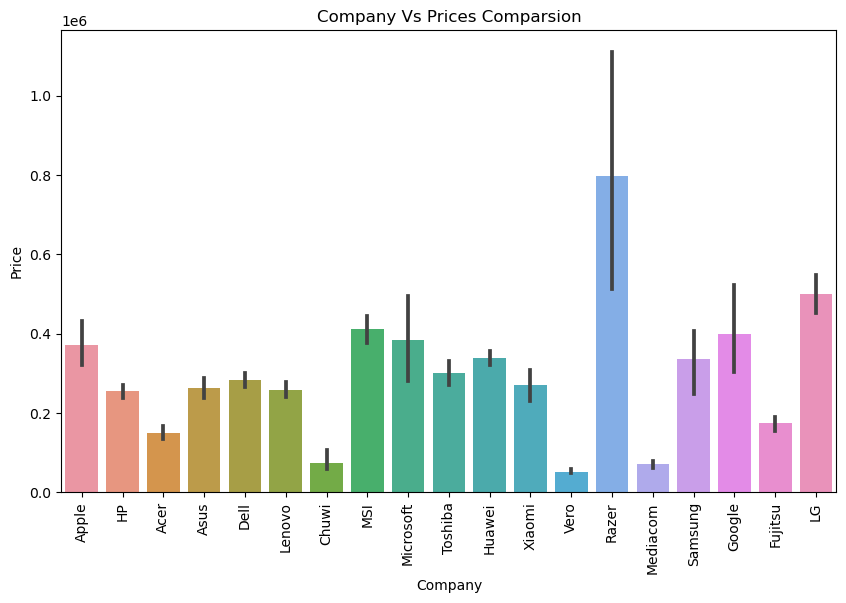

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.Company, y=df.Price)
plt.xticks(rotation='vertical')
plt.title("Company Vs Prices Comparsion")
plt.show()

**Observation**
- Price of Razer Laptop is highest

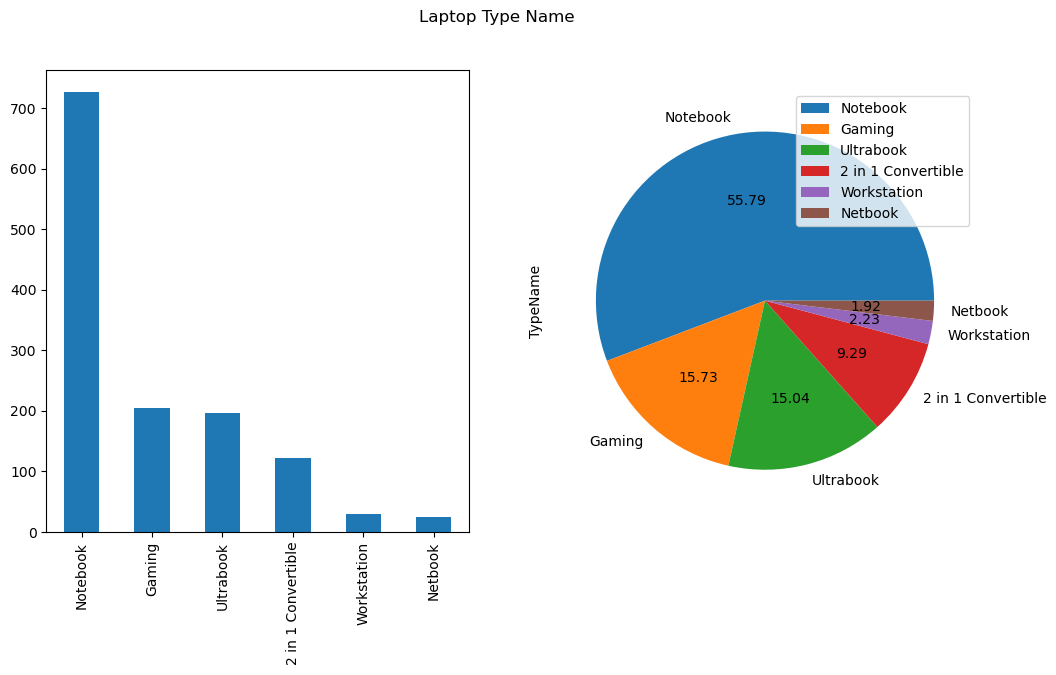

In [26]:
plt.figure(figsize=(12,6))
plt.suptitle("Laptop Type Name")
plt.subplot(1,2,1)
df.TypeName.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
df.TypeName.value_counts().plot(kind='pie',autopct='%.2f')
plt.legend(loc=1)
plt.show()

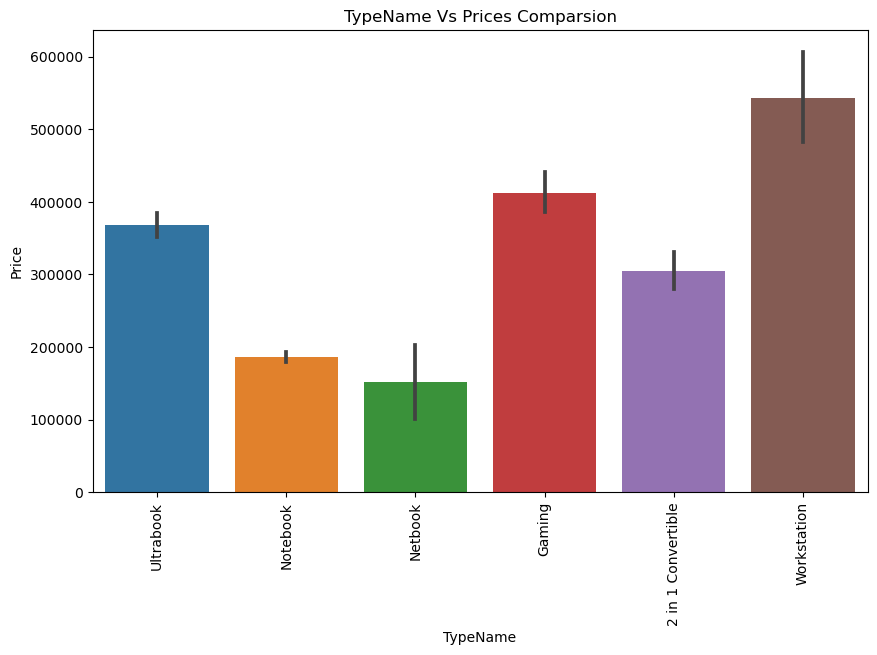

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.TypeName, y=df.Price)
plt.xticks(rotation='vertical')
plt.title("TypeName Vs Prices Comparsion")
plt.show()

**Observation**
- Price of **WorkStation** Laptop is **high** because workstation is very **powerfull machine.**

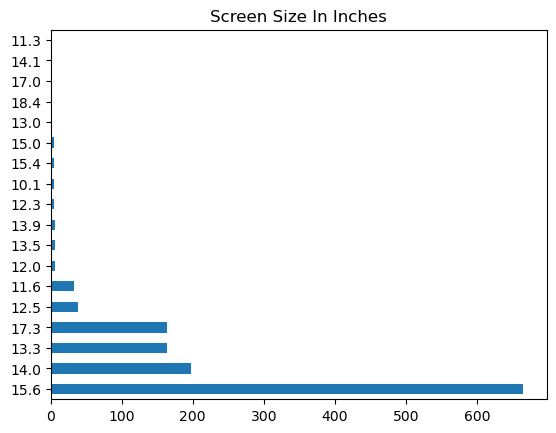

In [36]:
df.Inches.value_counts().plot(kind='barh')
plt.title('Screen Size In Inches')
plt.show()


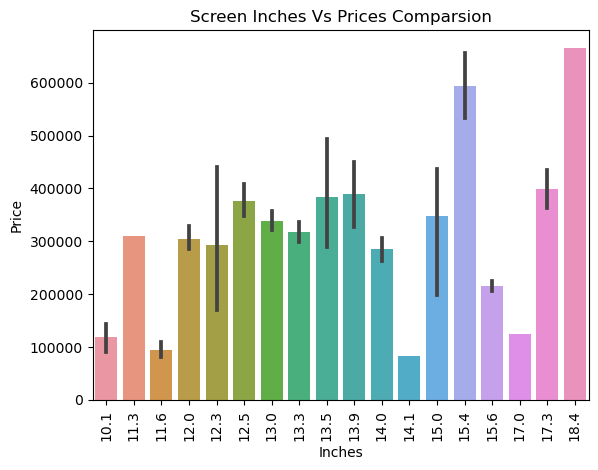

In [28]:
sns.barplot(x=df.Inches, y=df.Price)
plt.xticks(rotation='vertical')
plt.title("Screen Inches Vs Prices Comparsion")
plt.show()

**Observation**
- Size of Screen increase the price of laptop will increase.

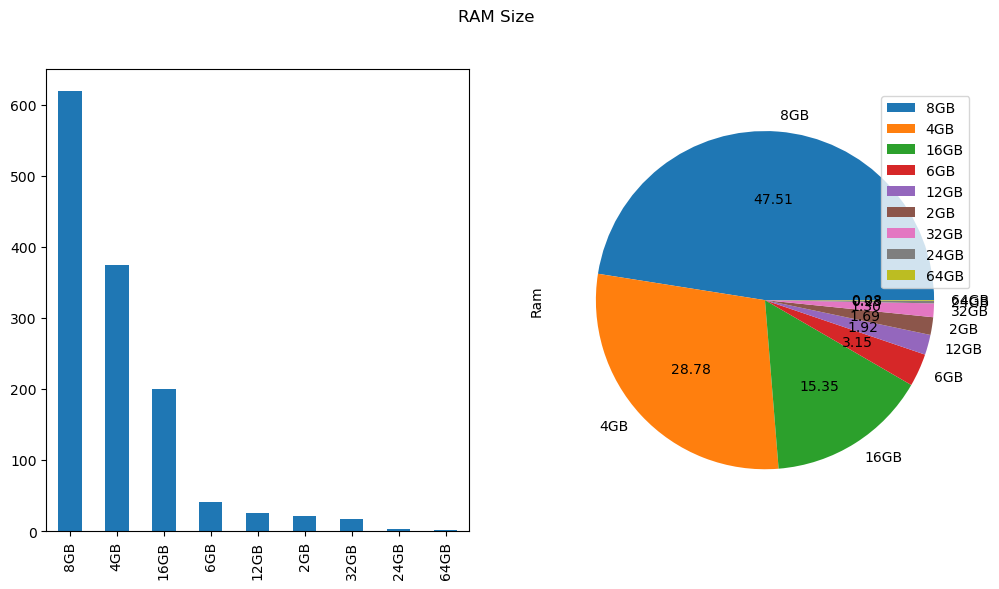

In [37]:
plt.figure(figsize=(12,6))
plt.suptitle("RAM Size")
plt.subplot(1,2,1)
df.Ram.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
df.Ram.value_counts().plot(kind='pie',autopct='%.2f')
plt.legend(loc=1)
plt.show()

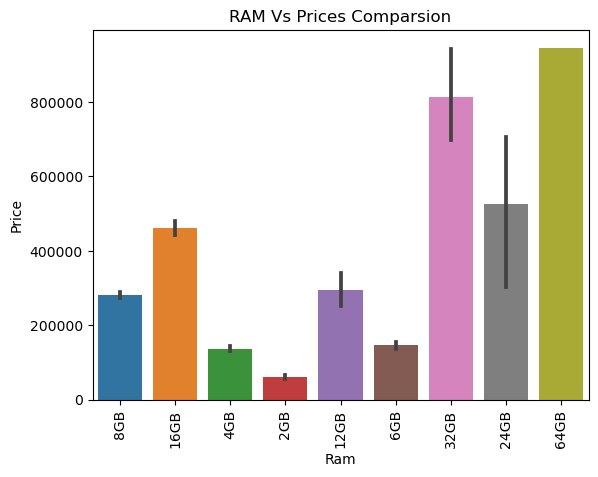

In [43]:
sns.barplot(x=df['Ram'], y=df["Price"])
plt.xticks(rotation='vertical')
plt.title("RAM Vs Prices Comparsion")
plt.show()

<AxesSubplot:>

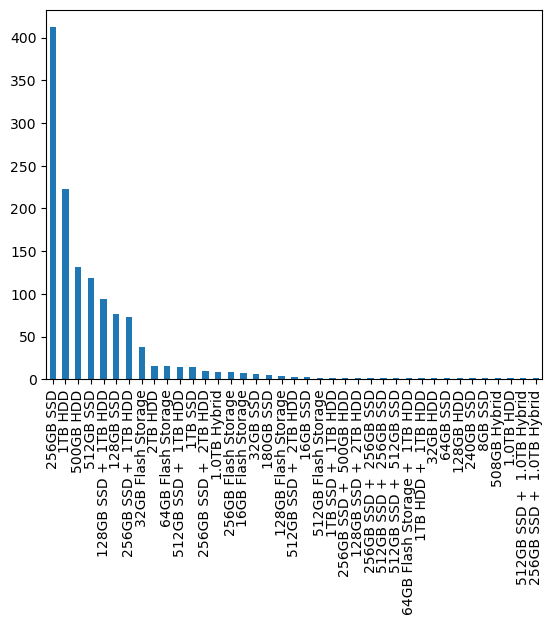

In [36]:
df.Memory.value_counts().plot(kind='bar')

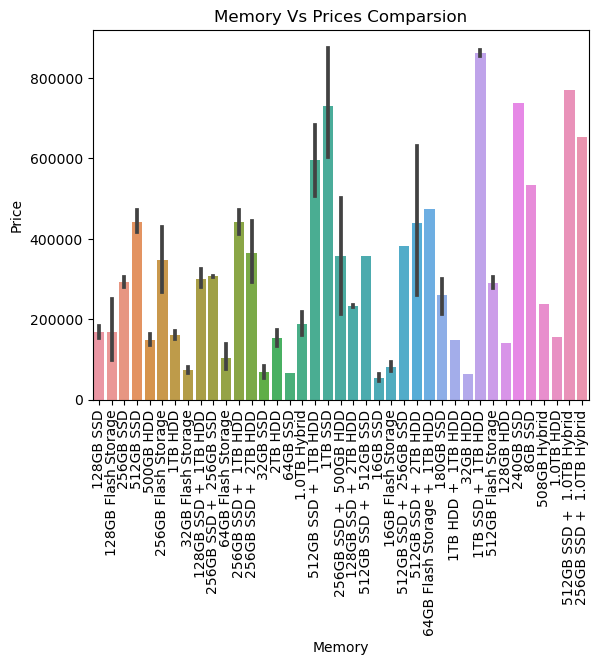

In [38]:
sns.barplot(x=df.Memory, y=df.Price)
plt.xticks(rotation='vertical')
plt.title("Memory Vs Prices Comparsion")
plt.show()

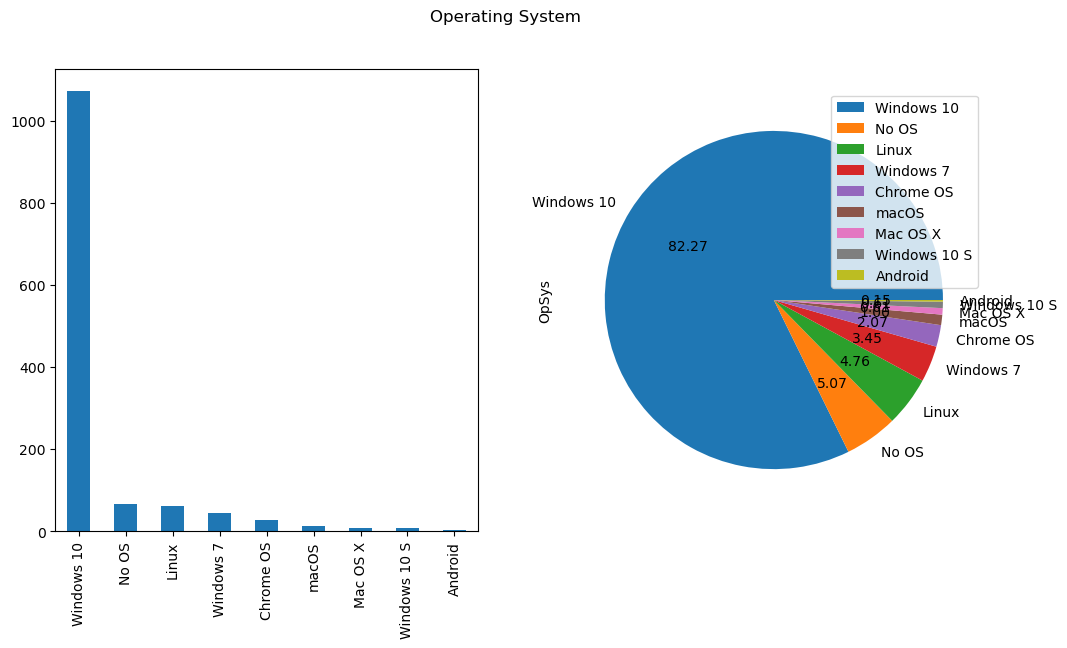

In [39]:
plt.figure(figsize=(12,6))
plt.suptitle("Operating System")
plt.subplot(1,2,1)
df.OpSys.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
df.OpSys.value_counts().plot(kind='pie',autopct='%.2f')
plt.legend(loc=1)
plt.show()

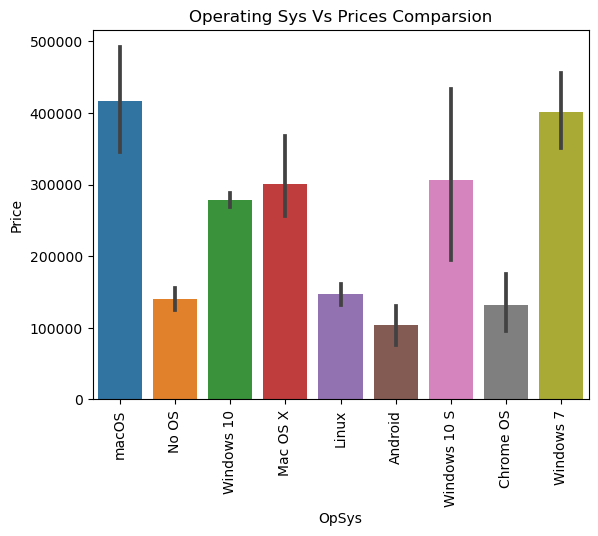

In [45]:
sns.barplot(x=df.OpSys, y=df.Price)
plt.xticks(rotation='vertical')
plt.title("Operating Sys Vs Prices Comparsion")
plt.show()